Generate RIXS spectra from DLS images

c:\Users\leona\anaconda3\envs\py310\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Retrieving filenames for run [360903]:
 - C:\Users\leona\OneDrive - Universität Zürich UZH\General - SrCrO3 substrates DIAMOND\data\processing\i21-360903.nxs
Elapsed time: 0.00 seconds. 

Performing generation of RIXS spectra from images and curvature correction.
Loading DLS images from C:\Users\leona\OneDrive - Universität Zürich UZH\General - SrCrO3 substrates DIAMOND\data\processing\i21-360903.nxs...
Retrieved 20 images from NeXus file.
DLS images and attributes loaded successfully.
Elapsed time: 0.19 seconds.
Using dark image from hdf file C:\Users\leona\OneDrive - Universität Zürich UZH\General - SrCrO3 substrates DIAMOND\data\Leo_python_code\dark_processed_361073_361074_361075.hdf5. 
No processing done. 

Removing spikes from images: kernel size 5x3x5, spikes_threshold=0.7.
Using median_filter of scipy.ndimage.
Found these spikes per image: 79, 69, 68, 145, 122, 42, 62, 112, 128, 95, 153, 110, 84, 95, 102, 94, 115, 139, 83, 39, 
Elapsed time: 52.91 seconds. 

Fitting completed. S

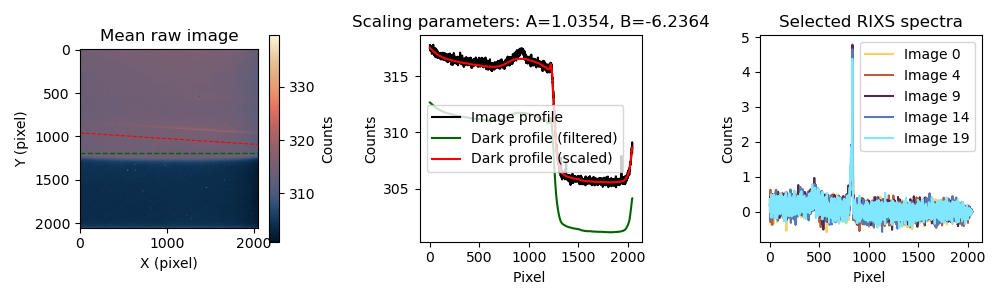

Normalization factor: 235.59165318 +- 1.1424572431700823
Total elapsed time for spectrum generation: 60.35 seconds. 



In [1]:
%matplotlib widget

from generate_rixs_spectra import RIXS_Raw_Images


facility = "DLS"
folder = r"C:\Users\leona\OneDrive - Universität Zürich UZH\General - SrCrO3 substrates DIAMOND\data\processing"
exp_number = "mm36539-2"
identifier_string = ""
run_number = [360903]

use_spc = False

# Path to HDF5 file containing processed dark images
dark_from_processed_file = True
file_path_dark = r"C:\Users\leona\OneDrive - Universität Zürich UZH\General - SrCrO3 substrates DIAMOND\data\Leo_python_code\dark_processed_361073_361074_361075.hdf5"
hdf5_path_to_dark = "/dark_no_spikes_filtered"  # Path within HDF5 file to dark images, if applicable
"""
If True, averages dark images before spike removal.
If False, removes spikes from each dark image independently, then averages.
If you have many dark images, averaging before spike removal is much faster.
"""
mean_before_spike_removal_dark = True

"""
Kernel size for median filter of dark images [vertical_pixels, horizontal_pixels]
Used in medfilt2d() to remove spikes from dark images
The median filter compares each pixel to its neighbors within this kernel window
Larger kernel sizes provide more aggressive spike removal but may blur legitimate features
Default [5,15] provides moderate spike removal while preserving image features
Can also be used as 3D kernel [frames, vertical_pixels, horizontal_pixels]
with median_filter from scipy.ndimage, but makes everything much slower.
"""
dark_median_filter_kernel_size = [5,15]

"""
Filtering parameters for dark images [vertical, horizontal]
For gaussian filter: sigma values for smoothing in each direction
For FFT filter: cutoff frequencies in each direction
For butterworth filter: cutoff frequencies in each direction
Larger values provide more aggressive filtering/smoothing
Used in scipy.ndimage.gaussian_filter() or custom FFT/Butterworth filters
Default gaussian filter with [3,15] provides moderate smoothing
"""
dark_smoothing_parameters = [3,15]
filtertype='gaussian'

"""
Kernel size for the image processing [frames, vertical_pixels, horizontal_pixels]
Used in scipy.ndimage.median_filter() to remove spikes from detector images
The 3D median filter compares each pixel to its neighbors within this kernel window
Pixels with (original - median)/count_time > threshold are classified as spikes and replaced
"""
spikes_threshold = 0.7
img_median_filter_kernel = [5,3,5]
# img_median_filter_kernel = [0,0,0]

"""
Slope (linear and quadratic) and calibration parameters for the detector.
Calibration is in units of eV/pixel
"""
curve_a = 0.06484
curve_b = 0
calibration = 0.00456

"""
Starting index for background fitting in the detector image
Used to determine the region where fitting of the background to image is performed.
Should be between the elastic line and the step in the background.
"""
index_start_fit_bkg = 1070

"""
Starting index for background fitting in the detector image
Used to determine the region where fitting of the background to image is performed.
Should be between the elastic line and the step in the background.
"""
find_aligning_range = True
alignRange = None

no_spc_parameters = {
    'file_path_dark': file_path_dark,
    'dark_from_processed_file': dark_from_processed_file,
    'hdf5_path_to_dark': hdf5_path_to_dark,
    'dark_median_filter_kernel_size': dark_median_filter_kernel_size,
    'dark_smoothing_parameters': dark_smoothing_parameters,
    'filtertype': filtertype,
    'mean_before_spike_removal_dark': mean_before_spike_removal_dark,
    'img_median_filter_kernel': img_median_filter_kernel,
    'indx_start_fit_bkg': index_start_fit_bkg,
    'curve_a': curve_a,
    'curve_b': curve_b,
    'spikes_threshold': spikes_threshold,
    }

rixs_images = RIXS_Raw_Images(
        facility=facility,
        folder=folder,
        identifier_string=id,
        run_number=run_number,
        exp_number=exp_number,
    )   
rixs_spectra = rixs_images.generate_rixs_spectra(use_spc=use_spc,
                no_spc_parameters=no_spc_parameters,
                find_aligning_range=find_aligning_range,
                plot_generation=True)



Attempting to find the range around the elastic line...
Using range: 791, 856 (x_data: 791.00, 856.00)
Calculating energy shifts of 20 spectra. Shifting spectra by: 
-0.34, -0.46, -0.59, -0.72, -0.85, -0.97, -1.10, -1.23, -1.36, -1.49, -1.61, -1.74, -1.87, -2.00, -2.13, -2.25, -2.38, -2.51, -2.64, -2.76, 
Elapsed time: 0.02 seconds. 



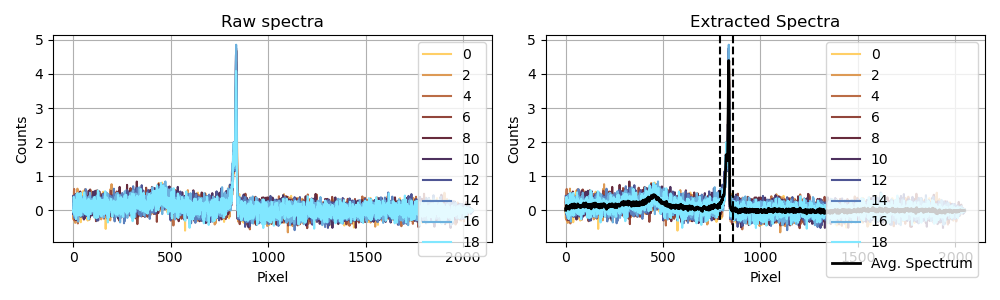

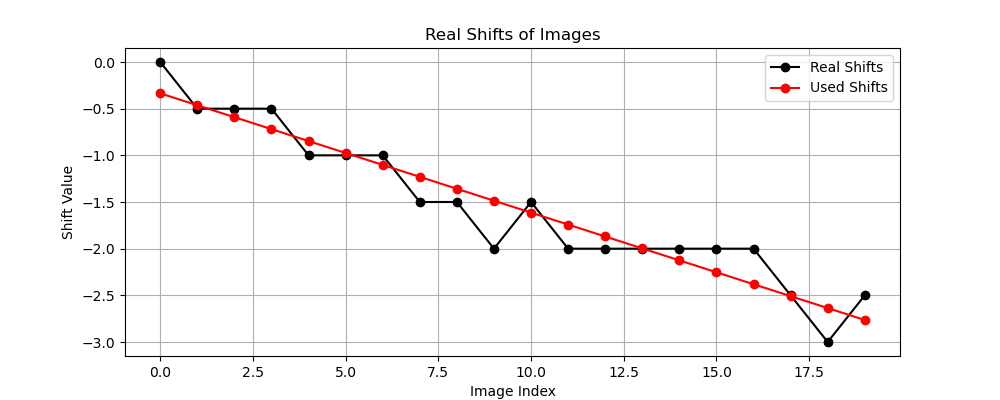

In [2]:
rixs_spectra.align_spectra(pixel_row_start=None,
                        pixel_row_stop=None,
                        fit_shifts=True,
                        smooth_shifts=False,
                        correlation_batch_size=1,
                        poly_order=1,
                        plot=True,)